In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
import torch

In [2]:
df = pd.read_csv("car_reviews.csv")

In [1]:
df.head(5)

NameError: name 'df' is not defined

In [4]:
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cuda:0


In [5]:
candidate_labels = ["driving experience", "features", "value for money", "issues", "other"]

In [6]:
def classify_reviews_in_batch(reviews, candidate_labels):
    return [zero_shot_classifier(review, candidate_labels, truncation=True)['labels'][0] for review in reviews]


In [8]:
batch_size = 16  # You can adjust the batch size depending on your GPU memory
reviews = df['Review'].tolist()
batch_labels = []

In [9]:
for i in range(0, len(reviews), batch_size):
    batch = reviews[i:i+batch_size]
    batch_labels.extend(classify_reviews_in_batch(batch, candidate_labels))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [11]:
df['talks_about'] = batch_labels

In [12]:
df.head()

,Review,talks_about
0,Bought 2017 Optima Hybrid in November 17. It w...,value for money
1,You get a lot for your money and great perfor...,value for money
2,This car is amazing and have no complaints. Y...,value for money
3,At 11k now in a lease for 39 months and it onl...,issues
4,"I've owned BMW, Lexus, Mercedes-Benz in the la...",value for money


In [13]:
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", truncation=True)

Device set to use cuda:0


In [14]:
def analyze_sentiment_in_batch(reviews):
    return [sentiment_analyzer(review, truncation=True)[0]['label'] for review in reviews]


In [15]:
batch_sentiments = []
for i in range(0, len(reviews), batch_size):
    batch = reviews[i:i+batch_size]
    batch_sentiments.extend(analyze_sentiment_in_batch(batch))

In [16]:
df['sentiment'] = batch_sentiments

In [18]:
df.head(20)

,Review,talks_about,sentiment
0,Bought 2017 Optima Hybrid in November 17. It w...,value for money,POSITIVE
1,You get a lot for your money and great perfor...,value for money,POSITIVE
2,This car is amazing and have no complaints. Y...,value for money,POSITIVE
3,At 11k now in a lease for 39 months and it onl...,issues,NEGATIVE
4,"I've owned BMW, Lexus, Mercedes-Benz in the la...",value for money,POSITIVE
5,Car does not get anywhere near advertised mile...,issues,NEGATIVE
6,"Bought new and got an awesome deal, love the ...",value for money,POSITIVE
7,I don't think KIA knows what the term hybrid m...,issues,NEGATIVE
8,I have sat in both the front and back seats a...,driving experience,POSITIVE
9,The back seats are so laid back you cannot st...,features,POSITIVE


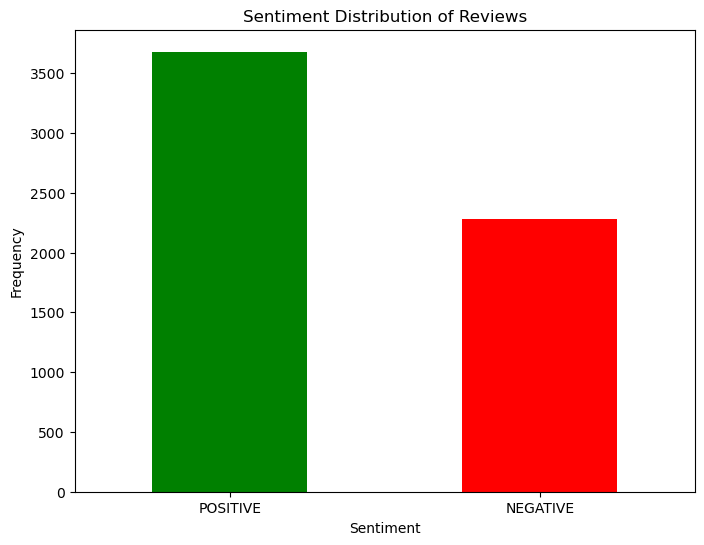

In [20]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

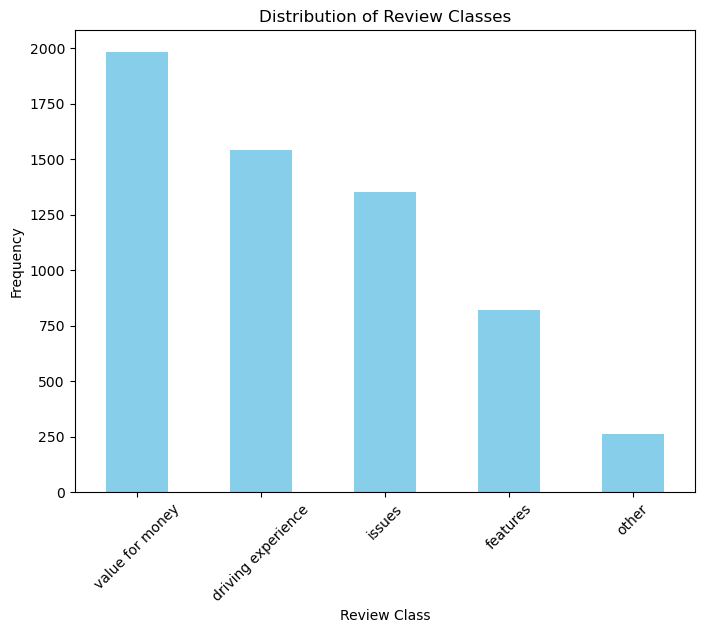

In [24]:
category_counts = df['talks_about'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Classes')
plt.xlabel('Review Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [25]:
df.to_csv("ml_car_reviews.csv", index=False)